In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data  = pd.read_csv("advertising.csv")

In [10]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
data.shape

(200, 4)

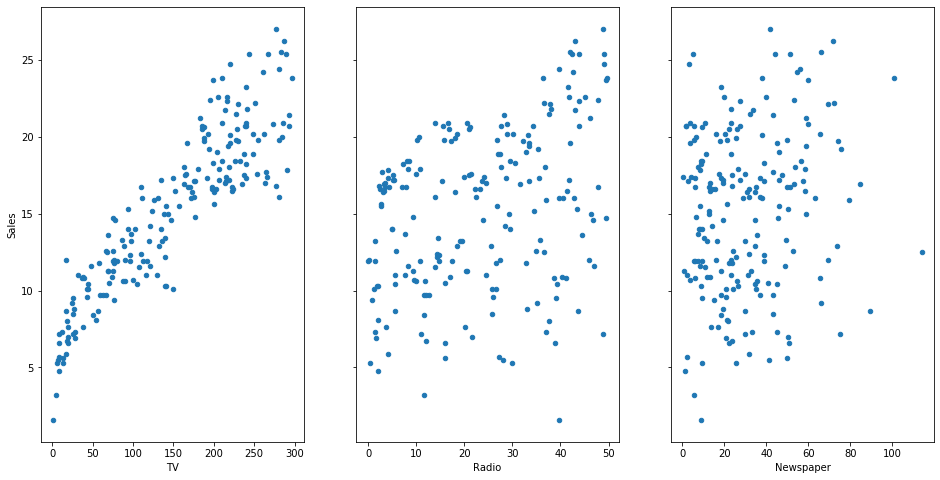

In [13]:
fig,axs = plt.subplots(1,3,sharey=True)

data.plot(kind='scatter', x='TV',y='Sales', ax =axs[0],figsize=(16,8))
data.plot(kind='scatter', x='Radio',y='Sales', ax =axs[1],figsize=(16,8))
data.plot(kind='scatter', x='Newspaper',y='Sales', ax =axs[2],figsize=(16,8))

In [14]:
X = data[['TV']]
y = data.Sales

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model  = LinearRegression()

In [33]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print(model.intercept_)

6.9748214882298925


In [35]:
print(model.coef_)

[0.05546477]


In [36]:
 # y = m x + c 
0.05546477*(50)+6.9748214882298925

9.748059988229892

In [37]:
X_new = pd.DataFrame({'TV':[50]})
X_new.head()

,TV
0,50


In [41]:
model.predict([[50]])

array([9.74806001])

In [42]:
X_new = pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
X_new

,TV
0,0.7
1,296.4


In [43]:
pred = model.predict(X_new)
pred

array([ 7.01364683, 23.41457946])

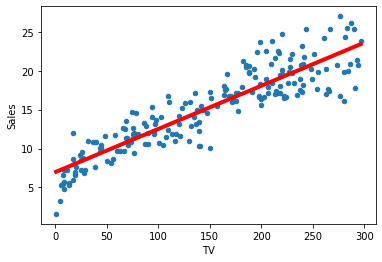

In [44]:
data.plot(kind='scatter', x='TV',y='Sales')
plt.plot(X_new,pred,c='red',linewidth=4)

In [24]:
# looking at the plot we can say that we have a high bias and low variance model

### #Hypothesis Testing and P Values 

 - Null Hypothesis: There is no relationship between TV ads and Sales 

- Null hypothesis is accpted if p value is greater then 0.05 in case of 95% CI
- Null hypothesis is accpted if p value is greater then 0.10 in case of 90% CI
- Null hypothesis is accpted if p value is greater then 0.01 in case of 99% CI

- Null hypothesis is rejected if p value is less then 0.05 in case of 95% CI
- Null hypothesis is rejected if p value is less then 0.10 in case of 90% CI
- Null hypothesis is rejected if p value is less then 0.01 in case of 99% CI


In [27]:
import statsmodels.formula.api as smf


In [28]:
linear_model = smf.ols(formula='Sales ~ TV', data=data).fit()

In [30]:
linear_model.conf_int()

,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


In [32]:
linear_model.pvalues
# The p value reprsents the possiblity that the coeficeint is actually zeero
# in this case p value is far less that 0.05
# hence we reject the null hypothesis that there is no relation between tv_ads and sales 
#and accept that there is a relationship between tv ads and sales 

Intercept    5.027719e-54
TV           7.927912e-74
dtype: float64

In [34]:

# how well the model if fitted
linear_model.rsquared

0.8121757029987414

In [35]:
# Its hard to say its good or not good rsquaredvalue mostly depends upon domain 

In [36]:
X = data[['TV','Radio','Newspaper']]
y = data.Sales

In [47]:
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train,y_test = model_selection.train_test_split(X,y,test_size=0.3,random_state=42)

In [43]:
mlm = LinearRegression()
mlm.fit(X,y)
print(mlm.coef_)
print(mlm.intercept_)

[0.05444578 0.10700123 0.00033566]
4.625124078808655


In [44]:
mlm2 = LinearRegression()
mlm2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
print(mlm2.coef_)
print(mlm2.intercept_)

[0.05358869 0.10270677 0.00793167]
4.7437667015896885


In [46]:
pred = mlm2.predict(x_test)

In [52]:

print((mean_squared_error(pred,y_test))**.5)

1.5942471691143594


In [ ]:
stats_lm